In [ ]:
import torch

In [ ]:
words = open('names.txt', 'r').read().splitlines()

In [ ]:
char = sorted(list(set(''.join(words))))
stoi = {c: index+1 for index,c in enumerate(char)}
stoi['.'] = 0
itos = {v:k for k,v in stoi.items()}

In [ ]:
Dict = torch.zeros([len(stoi), len(stoi)], dtype=float)
for w in words:
    #appending start and end tokens
    w = '.' + w + '.'
    for ch1, ch2 in zip(w, w[1:]):
      Dict[stoi[ch1], stoi[ch2]] += 1

(-0.5, 26.5, 26.5, -0.5)

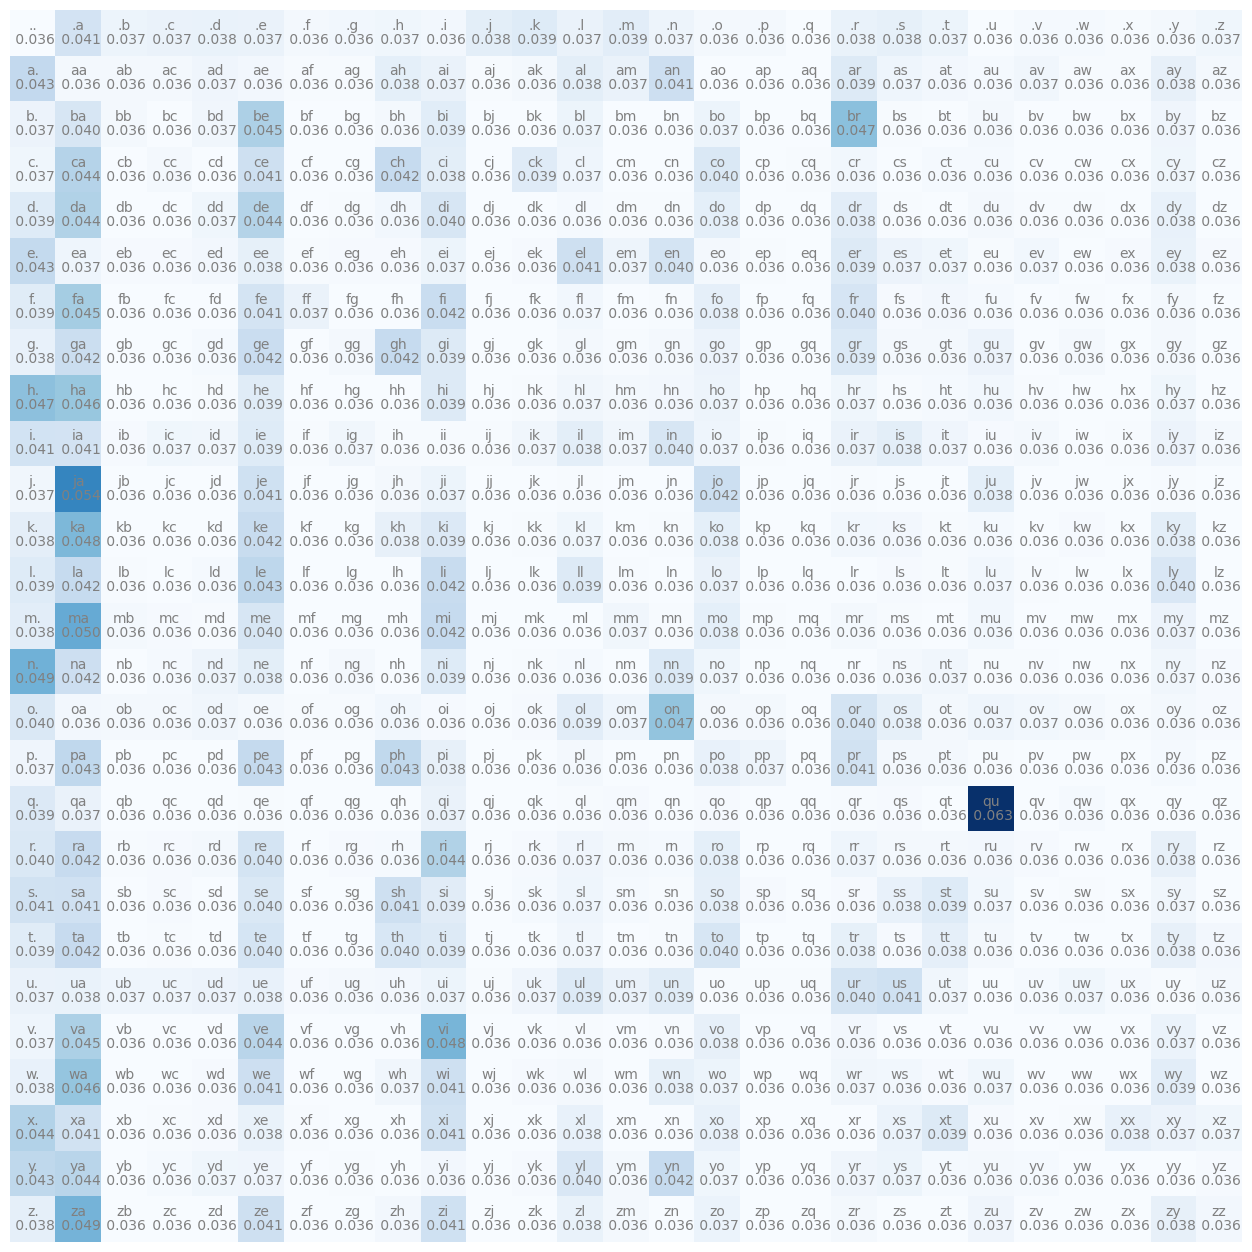

In [ ]:
import matplotlib.pyplot as plt
# plt.plot()
plt.figure(figsize = (16,16))
plt.imshow(Dict, cmap='Blues')

for i in range(27):
  for j in range(27):
    chrstr = itos[i]+itos[j]
    plt.text(j, i, chrstr, ha='center', va='bottom', color='gray')
    plt.text(j, i, f"{Dict[i,j].item(): .3f}", ha='center', va='top', color='gray')
plt.axis('off')

In [ ]:
Dict = Dict+1
Dict = Dict/torch.sum(Dict, dim = 1, keepdim= True)

In [ ]:
torch.sum(Dict[0])

tensor(1., dtype=torch.float64)

In [ ]:
#generate new words

generator = torch.Generator().manual_seed(0)
for i in range(20):
  curr  = stoi['.']
  out = []
  while True:
      curr = torch.multinomial(Dict[curr], replacement= True, generator=generator, num_samples=1).item()
      if curr == stoi['.']:
        print(''.join(out))
        break
      out.append(itos[curr])


In [ ]:
#likelihood
log_likelihood = 0
count = 0
for w in words:
  w = '.' + w + '.'
  for ch1, ch2 in zip(w, w[1:]):
    prob = Dict[stoi[ch1], stoi[ch2]]
    log_likelihood -= torch.log(prob)
    count  += 1

print(f'average loss function {log_likelihood/count}')



average loss function 3.215970160930099


In [ ]:
#Neural network
xs, ys = [], []
for w in words:
  chl = ['.'] + list(w)  + ['.']
  for ch1, ch2 in zip(chl, chl[1:]):
    xs.append(stoi[ch1])
    ys.append(stoi[ch2])

X = torch.tensor(xs)
Y = torch.tensor(ys)

In [ ]:
import torch.nn.functional as F
X_enc = F.one_hot(X, num_classes = 27)